In [1]:
from copy import deepcopy

import torch
import scvi
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:2: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
Global seed set to 0
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [3]:
import os
os.chdir('../feature_attribution_sc/')

In [4]:
from explainers.neutral_input import neutral_input

In [5]:
hlca_path = '/lustre/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/HLCA_reproducibility/data/HLCA_core_h5ads/HLCA_v1_integration/HLCA_v1_scANVI_input.h5ad'
adata = sc.read(hlca_path)
adata

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/sample' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/sample' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/original_celltype_ann' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packa

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/ann_level_3' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/ann_level_3' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/ann_level_4' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/ann_level_4' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/yuge.ji/minicond

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/uns' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/anatomical_region_level_1_colors' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/ann_level_1_colors' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/ann_level_2_clean_colors' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/icb/yuge.ji/miniconda3/envs/test

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/raw/var/__categories/gene_symbols' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/raw/var/gene_symbols' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/raw/var/n_cells' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/raw/var/highly_variable' was written without encoding metadata.
  return read_elem(dataset)
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.1

AnnData object with n_obs × n_vars = 587218 × 2000
    obs: 'sample', 'original_celltype_ann', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'subject_ID_as_published', 'pre_or_postnatal', 'age_in_years', 'age_range', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'smoking_history', 'BMI', 'known_lung_disease', 'condition', 'subject_type', 'cause_of_death', 'sample_type', 'anatomical_region_coarse', 'anatomical_region_detailed', 'tissue_dissociation_protocol', 'cells_or_nuclei', 'single_cell_platform', "3'_or_5'", 'enrichment', 'sequencing_platform', 'reference_genome_coarse', 'ensembl_release_reference_genome', 'cell_ranger_version', 'disease_status', 'fresh_or_frozen', 'cultured', 'cell_viability_%', 'comments', 'Processing_site', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_highest_res', 'ann_ne

In [6]:
model = scvi.model.SCANVI.load('/home/icb/yuge.ji/projects/HLCA_reproducibility/notebooks/3_atlas_extension/scanvi_model/', adata)

INFO     File /home/icb/yuge.ji/projects/HLCA_reproducibility/notebooks/3_atlas_extension/sca
         nvi_model/model.pt already downloaded                                               


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scvi/data/_utils.py:156: UserWarning: Category 18 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(


In [7]:
model.summary_stats

attrdict({'n_cells': 587218, 'n_vars': 2000, 'n_batch': 14, 'n_labels': 29, 'n_extra_categorical_covs': 0, 'n_extra_continuous_covs': 0})

Epoch 0: max probability - 1.0.
Epoch 100: max probability - 0.3354429006576538.
Epoch 200: max probability - 0.17144404351711273.
Epoch 300: max probability - 0.14349956810474396.
Epoch 400: max probability - 0.14379841089248657.
Epoch 500: max probability - 0.1425599455833435.
Epoch 600: max probability - 0.1427953988313675.
Epoch 700: max probability - 0.2146667093038559.
Epoch 800: max probability - 0.17059427499771118.
Epoch 900: max probability - 0.14437329769134521.
Epoch 1000: max probability - 0.1451849341392517.
Epoch 1100: max probability - 0.15926140546798706.
Epoch 1200: max probability - 0.17456364631652832.
Epoch 1300: max probability - 0.5161625742912292.
Epoch 1400: max probability - 0.251529335975647.
Epoch 1500: max probability - 0.2507193982601166.
Epoch 1600: max probability - 0.20861874520778656.
Epoch 1700: max probability - 0.1504054069519043.
Epoch 1800: max probability - 0.07593026757240295.
Epoch 1900: max probability - 0.0727442279458046.


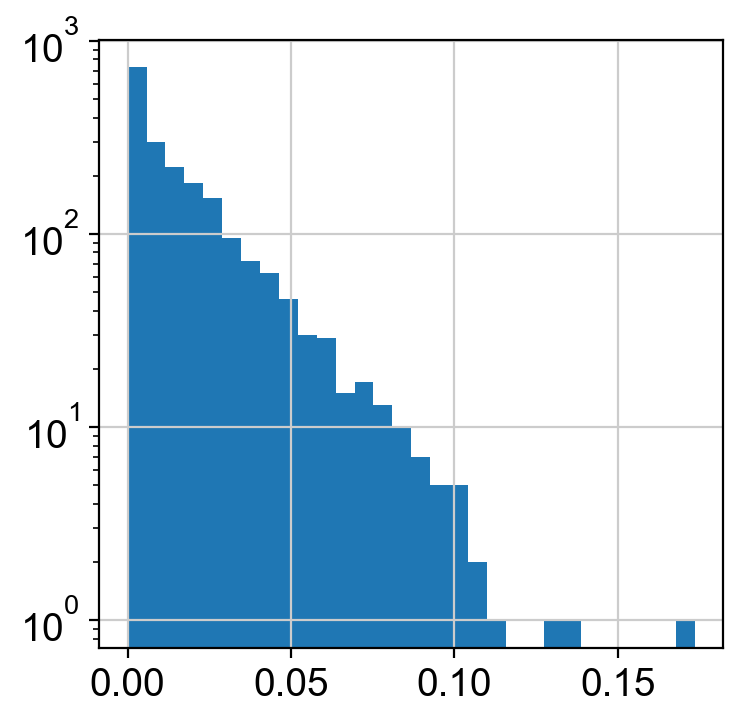

In [8]:
inpt = neutral_input(model, batch_index=0)
plt.hist(inpt.cpu().numpy()[0], bins=30)
plt.yscale('log')

Epoch 0: max probability - 1.0.
Epoch 100: max probability - 0.3354429006576538.
Epoch 200: max probability - 0.17144404351711273.
Epoch 300: max probability - 0.14349956810474396.
Epoch 400: max probability - 0.14379841089248657.
Epoch 500: max probability - 0.1425599455833435.
Epoch 600: max probability - 0.1427953988313675.
Epoch 700: max probability - 0.2146667093038559.
Epoch 800: max probability - 0.17059427499771118.
Epoch 900: max probability - 0.14437329769134521.
Epoch 1000: max probability - 0.1451849341392517.
Epoch 1100: max probability - 0.15926140546798706.
Epoch 1200: max probability - 0.17456364631652832.
Epoch 1300: max probability - 0.5161625742912292.
Epoch 1400: max probability - 0.251529335975647.
Epoch 1500: max probability - 0.2507193982601166.
Epoch 1600: max probability - 0.20861874520778656.
Epoch 1700: max probability - 0.1504054069519043.
Epoch 1800: max probability - 0.07593026757240295.
Epoch 1900: max probability - 0.0727442279458046.


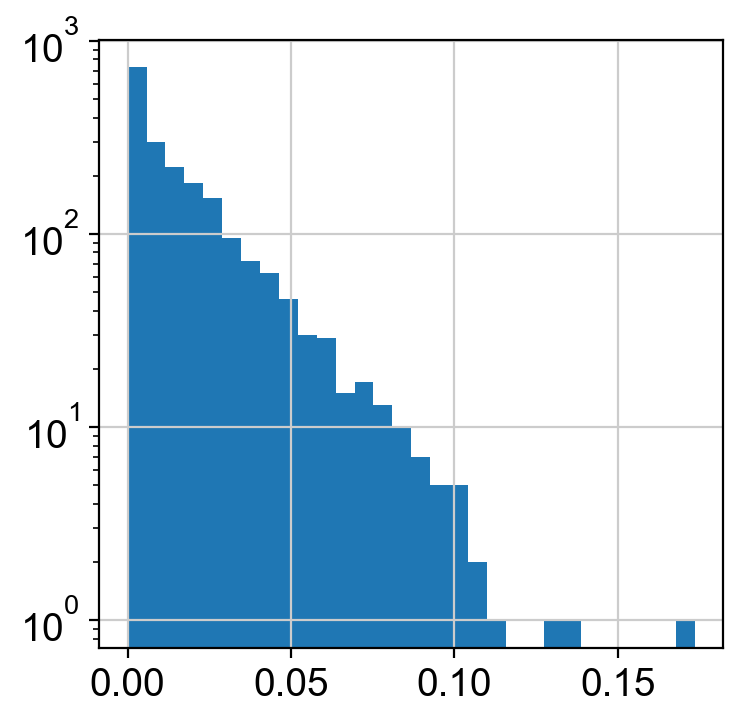

In [9]:
inpt = neutral_input(model, batch_index=0)
plt.hist(inpt.cpu().numpy()[0], bins=30)
plt.yscale('log')

In [10]:
adata.layers['counts'].sum(1).mean()

1371.6908

Epoch 0: max probability - 0.9999998807907104.
Epoch 100: max probability - 0.5034283995628357.
Epoch 200: max probability - 0.23451392352581024.
Epoch 300: max probability - 0.20925797522068024.
Epoch 400: max probability - 0.1671311855316162.
Epoch 500: max probability - 0.1679454743862152.
Epoch 600: max probability - 0.168679878115654.
Epoch 700: max probability - 0.14751332998275757.
Epoch 800: max probability - 0.1441856324672699.
Epoch 900: max probability - 0.1440618485212326.
Epoch 1000: max probability - 0.14428529143333435.
Epoch 1100: max probability - 0.1443772315979004.
Epoch 1200: max probability - 0.1458815038204193.
Epoch 1300: max probability - 0.22066499292850494.
Epoch 1400: max probability - 0.13134866952896118.
Epoch 1500: max probability - 0.12358202040195465.
Epoch 1600: max probability - 0.09003182500600815.
Epoch 1700: max probability - 0.08070764690637589.
Epoch 1800: max probability - 0.07723022997379303.
Epoch 1900: max probability - 0.07293937355279922.


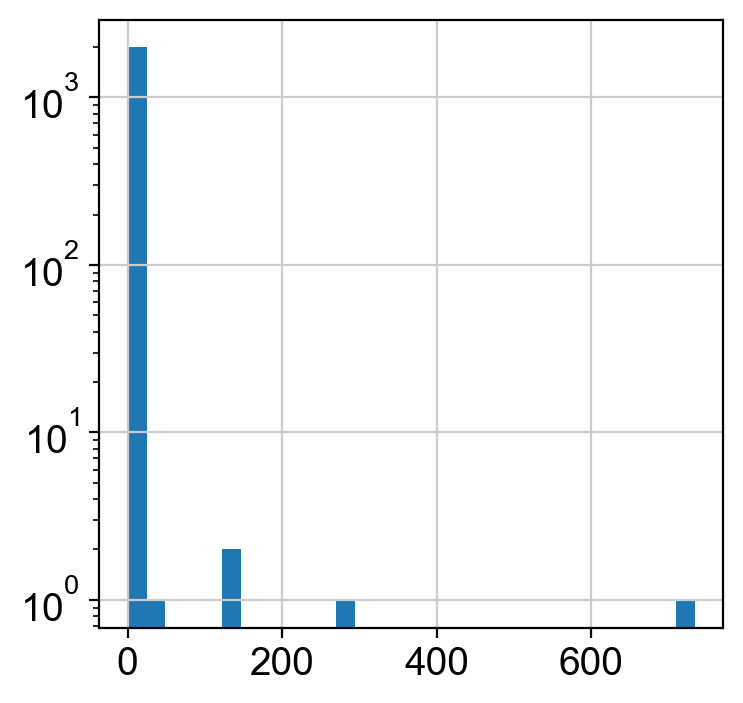

In [11]:
inpt = neutral_input(model, batch_index=0, size_factor=adata.layers['counts'].sum(1).mean())
plt.hist(inpt.cpu().numpy()[0], bins=30)
plt.yscale('log')

In [12]:
adata.layers['counts'].mean(1).mean()

0.68584543

Epoch 0: max probability - 1.0.
Epoch 100: max probability - 0.20799465477466583.
Epoch 200: max probability - 0.18518930673599243.
Epoch 300: max probability - 0.16003185510635376.
Epoch 400: max probability - 0.14296595752239227.
Epoch 500: max probability - 0.14198440313339233.
Epoch 600: max probability - 0.14221864938735962.
Epoch 700: max probability - 0.40564700961112976.
Epoch 800: max probability - 0.168501079082489.
Epoch 900: max probability - 0.16107937693595886.
Epoch 1000: max probability - 0.14503411948680878.
Epoch 1100: max probability - 0.1460583359003067.
Epoch 1200: max probability - 0.206986665725708.
Epoch 1300: max probability - 0.16643919050693512.
Epoch 1400: max probability - 0.16635046899318695.
Epoch 1500: max probability - 0.15187343955039978.
Epoch 1600: max probability - 0.372252494096756.
Epoch 1700: max probability - 0.07812783122062683.
Epoch 1800: max probability - 0.07479564845561981.
Epoch 1900: max probability - 0.07263875007629395.


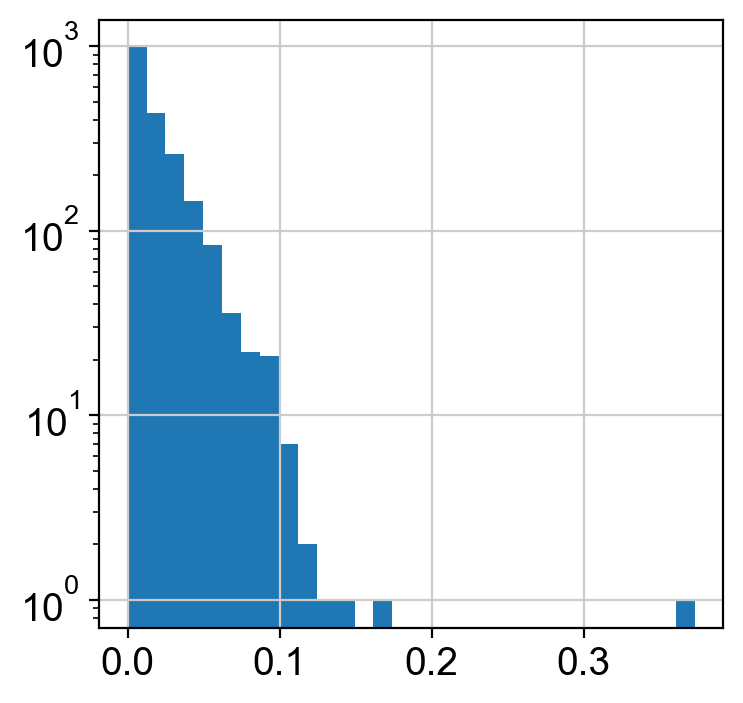

In [13]:
inpt = neutral_input(model, batch_index=0, size_factor=adata[adata.obs.dataset == 'Banovich_Kropski_2020'].layers['counts'].mean(1).mean())
plt.hist(inpt.cpu().numpy()[0], bins=30)
plt.yscale('log')